In [1]:
from minimappers2 import AlignerBuilder, Aligner, Sequence
from needletail import parse_fastx_file, NeedletailError, reverse_complement, normalize_seq

In [2]:
aligner_builder = AlignerBuilder.short();
aligner_builder.cigar()
aligner = aligner_builder.index("../../fakeminimap2/hg38_chr_M.mmi")
aligner.set_threads(4);

In [6]:
sequences = []

try:
    for record in parse_fastx_file("../../fakeminimap2/testing_fake_minimap2_chrM.fasta"):
        sequences.append(Sequence(record.id, record.seq))
except NeedletailError:
    print("Ivalid Fasta file")

In [9]:
aligner.map1(sequences[0])

query_name,query_len,query_start,query_end,strand,target_name,target_len,target_start,target_end,match_len,block_len,mapq,is_primary,nm,cigar_str,md,cs
str,u32,i32,i32,str,str,i32,i32,i32,i32,i32,u32,bool,i32,str,str,str
"""test_read_1_2201_2451""",250,0,250,"""+""","""NC_012920.1""",16569,2201,2451,250,250,60,true,0,"""250M""","""250""",""":250"""


In [10]:
result = aligner.map(sequences)

In [11]:
result

query_name,query_len,query_start,query_end,strand,target_name,target_len,target_start,target_end,match_len,block_len,mapq,is_primary,nm,cigar_str,md,cs
str,u32,i32,i32,str,str,i32,i32,i32,i32,i32,u32,bool,i32,str,str,str
"""test_read_18_464_4964""",4500,0,4500,"""+""","""NC_012920.1""",16569,464,4964,4499,4499,60,true,1,"""4500M""","""4500""",""":4500"""
"""test_read_20_7090_12090""",5000,0,5000,"""+""","""NC_012920.1""",16569,7090,12090,5000,5000,60,true,0,"""5000M""","""5000""",""":5000"""
"""test_read_19_6386_11136""",4750,0,4750,"""+""","""NC_012920.1""",16569,6386,11136,4750,4750,60,true,0,"""4750M""","""4750""",""":4750"""
"""test_read_15_3439_7189""",3750,0,3750,"""+""","""NC_012920.1""",16569,3439,7189,3750,3750,60,true,0,"""3750M""","""3750""",""":3750"""
"""test_read_17_7993_12243""",4250,0,4250,"""+""","""NC_012920.1""",16569,7993,12243,4250,4250,60,true,0,"""4250M""","""4250""",""":4250"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""test_read_6_1033_2533""",1500,0,1500,"""+""","""NC_012920.1""",16569,1033,2533,1500,1500,60,true,0,"""1500M""","""1500""",""":1500"""
"""test_read_5_12513_13763""",1250,0,1250,"""+""","""NC_012920.1""",16569,12513,13763,1250,1250,60,true,0,"""1250M""","""1250""",""":1250"""
"""test_read_1_2201_2451""",250,0,250,"""+""","""NC_012920.1""",16569,2201,2451,250,250,60,true,0,"""250M""","""250""",""":250"""


In [12]:
import plotly.express as px

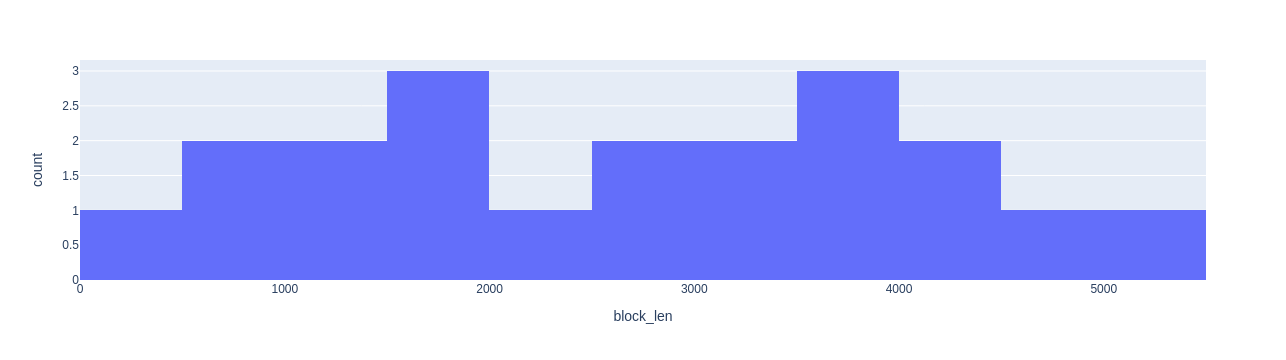

In [20]:
px.histogram(result.to_pandas(), x="block_len", nbins=10)

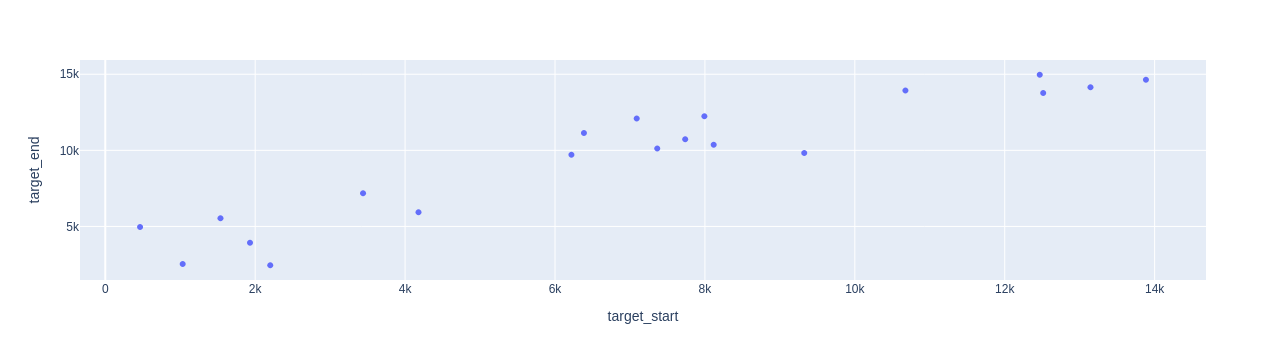

In [24]:
px.scatter(result.to_pandas(), x="target_start", y="target_end")